# PROGRAMMING PROJECT

In [93]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [94]:
# ===== Question 6 =====
# Create a detailed descriptive statistics report about the dependent variable of the chosen dataset.

import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
DATA_PATH = "UAEPopulationByEmiratesNationalityandgender.xlsx"
df = pd.read_excel(DATA_PATH)
df.columns = [c.strip() for c in df.columns]
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Function for descriptive statistics
def descriptive_stats(series: pd.Series) -> pd.DataFrame:
    s = pd.to_numeric(series, errors='coerce').dropna()
    desc = s.describe(percentiles=[0.25, 0.5, 0.75]).to_dict()
    desc.update({
        "skew": stats.skew(s, bias=False),
        "kurtosis": stats.kurtosis(s, bias=False, fisher=True)
    })
    order = ["count", "mean", "std", "min", "25%", "50%", "75%", "max", "skew", "kurtosis"]
    return pd.DataFrame({"value": [desc.get(k, np.nan) for k in order]}, index=order)

# Apply the function to the dependent variable
print(descriptive_stats(df["value"]))


                  value
count       1120.000000
mean       67833.978571
std       127229.381455
min          450.000000
25%         9469.500000
50%        26252.500000
75%        60214.750000
max       920310.000000
skew           4.119124
kurtosis      20.109249


In [82]:
# ===== Question 7 =====
import pandas as pd
import numpy as np
from scipy import stats

DATA_PATH = "UAEPopulationByEmiratesNationalityandgender.xlsx"  # adjust if needed

df = pd.read_excel(DATA_PATH)
df.columns = [c.strip() for c in df.columns]
df["value"] = pd.to_numeric(df["value"], errors="coerce")

def descriptive_stats(series: pd.Series) -> pd.DataFrame:
    s = pd.to_numeric(series, errors='coerce').dropna()
    desc = s.describe(percentiles=[0.25, 0.5, 0.75]).to_dict()
    desc.update({
        "skew": stats.skew(s, bias=False),
        "kurtosis": stats.kurtosis(s, bias=False, fisher=True)
    })
    order = ["count","mean","std","min","25%","50%","75%","max","skew","kurtosis"]
    return pd.DataFrame({"value": [desc.get(k, np.nan) for k in order]}, index=order)

np.random.seed(42)
sample_150 = df.sample(n=150, replace=True, random_state=42)
print(descriptive_stats(sample_150["value"]))


                  value
count        150.000000
mean       66229.853333
std       115943.321460
min          488.000000
25%        11874.000000
50%        29743.500000
75%        66007.000000
max       749893.000000
skew           4.011944
kurtosis      18.541290


In [83]:
# ===== Question 8 =====

import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
DATA_PATH = "UAEPopulationByEmiratesNationalityandgender.xlsx"
df = pd.read_excel(DATA_PATH)
df.columns = [c.strip() for c in df.columns]
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Descriptive stats function (from Q6)
def descriptive_stats(series: pd.Series) -> pd.DataFrame:
    s = pd.to_numeric(series, errors='coerce').dropna()
    desc = s.describe(percentiles=[0.25, 0.5, 0.75]).to_dict()
    desc.update({
        "skew": stats.skew(s, bias=False),
        "kurtosis": stats.kurtosis(s, bias=False, fisher=True)
    })
    order = ["count","mean","std","min","25%","50%","75%","max","skew","kurtosis"]
    return pd.DataFrame({"value": [desc.get(k, np.nan) for k in order]}, index=order)

# -----------------------------
# Systematic sampling
# -----------------------------
# Example condition: Non-Nationals in year 2005
filtered_df = df[(df["Nationality_EN"] == "Non-National") & (df["year"] == 2005)]

# Sampling interval k
k = 5  # take every 5th row
systematic_sample = filtered_df.iloc[::k, :]

# Apply descriptive stats
sample_stats = descriptive_stats(systematic_sample["value"])

# Print results
print("Descriptive Statistics for Systematic Sample:")
print(sample_stats)


Descriptive Statistics for Systematic Sample:
                  value
count         23.000000
mean      258226.391304
std       303122.552226
min        11116.000000
25%        43667.500000
50%        85143.000000
75%       374120.500000
max       920310.000000
skew           1.260823
kurtosis       0.305856


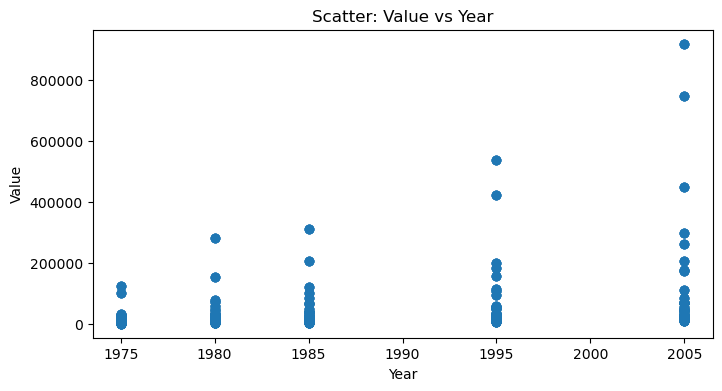

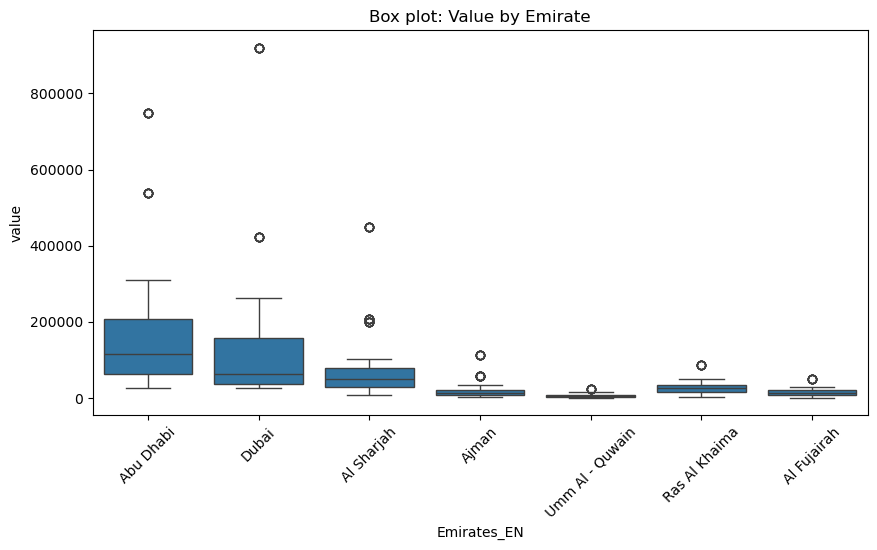

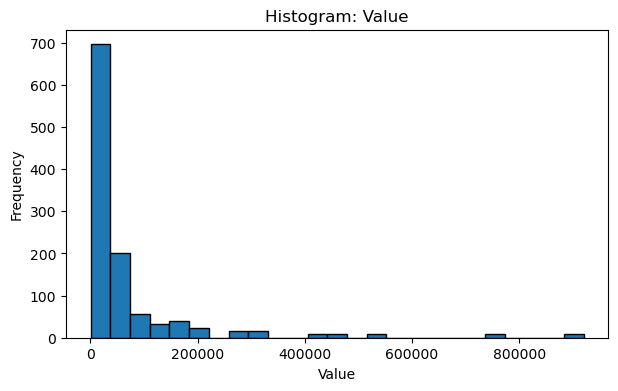

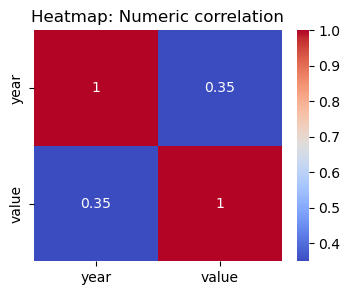

In [84]:
# ===== Question 10 =====
# Visualize the dependent variable by the Graph/Chart of the following:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# a. Scatter plot (Value vs Year)
plt.figure(figsize=(8,4))
plt.scatter(df['year'], df['value'], alpha=0.6)
plt.title('Scatter: Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

# b. Box plot (Value by Emirate)
plt.figure(figsize=(10,5))
sns.boxplot(x='Emirates_EN', y='value', data=df)
plt.title('Box plot: Value by Emirate')
plt.xticks(rotation=45)
plt.show()

# c. Histogram
plt.figure(figsize=(7,4))
plt.hist(df['value'].dropna(), bins=25, edgecolor='black')
plt.title('Histogram: Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# d. Heatmap (correlation matrix for numeric variables)
num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(4,3))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Numeric correlation')
plt.show()



In [85]:
# ===== Question 11 =====
from scipy import stats
import pandas as pd

# Pearson & Spearman correlation (year vs value)
if {'year','value'}.issubset(df.columns):
    mask = (~df['year'].isna()) & (~df['value'].isna())
    pearson_r, pearson_p = stats.pearsonr(df.loc[mask,'year'], df.loc[mask,'value'])
    spearman_r, spearman_p = stats.spearmanr(df.loc[mask,'year'], df.loc[mask,'value'])
    print(f'Pearson r={pearson_r:.4f}, p={pearson_p:.6f}')
    print(f'Spearman rho={spearman_r:.4f}, p={spearman_p:.6f}')
else:
    print('year or value not present for Pearson/Spearman.')

# Chi-square test (Gender_EN vs Value High/Low)
if 'Gender_EN' in df.columns and 'value' in df.columns:
    median_val = df['value'].median()
    df['Value_High'] = (df['value'] > median_val).astype(int)
    ct = pd.crosstab(df['Gender_EN'], df['Value_High'])
    chi2, chi_p, chi_dof, chi_exp = stats.chi2_contingency(ct)
    print(f'Chi-square test: chi2={chi2:.4f}, p={chi_p:.6f}, dof={chi_dof}')
    print('Contingency table:')
    print(ct)
else:
    print('Gender_EN or value not present for Chi-square.')



Pearson r=0.3492, p=0.000000
Spearman rho=0.4639, p=0.000000
Chi-square test: chi2=7.8893, p=0.004973, dof=1
Contingency table:
Value_High    0    1
Gender_EN           
Male        256  304
female      304  256


In [86]:
# ===== Question 12 =====
import pandas as pd
from scipy import stats

# Columns
value_col = 'value'
emirate_col = 'Emirates_EN'

# Overall population mean
overall_mean = df[value_col].mean()

# Select sample group (Dubai if available)
group_name = 'Dubai' if 'Dubai' in df[emirate_col].unique() else df[emirate_col].unique()[0]

# Run one-sample t-test
if emirate_col in df.columns and value_col in df.columns:
    sample = df[df[emirate_col] == group_name][value_col].dropna()

    if len(sample) >= 2:
        t_stat, t_p = stats.ttest_1samp(sample, popmean=overall_mean)
        print(f"Sample group: {group_name}, n={len(sample)}, sample_mean={sample.mean():.2f}")
        print(f"t-stat={t_stat:.4f}, p={t_p:.6f}")
    else:
        print("Not enough observations for one-sample t-test.")
else:
    print("Required columns not found.")


Sample group: Dubai, n=160, sample_mean=142057.45
t-stat=4.5983, p=0.000009


In [87]:
# ===== Question 13 =====
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_col = 'year'
y_col = 'value'

# Check if columns exist
if {X_col, y_col}.issubset(df.columns):

    # Prepare data
    X = df[[X_col]].dropna()
    y = df.loc[X.index, y_col]

    # Build and train model
    model = LinearRegression().fit(X, y)

    # Predict
    y_pred = model.predict(X)

    # Results
    print(f'Coef={model.coef_[0]:.6f}, Intercept={model.intercept_:.3f}')
    print('R2=', r2_score(y, y_pred))

else:
    print(f'{X_col} or {y_col} missing for simple regression')



Coef=4123.110468, Intercept=-8128909.632
R2= 0.12193293713530029


In [88]:
# ===== Question 14 =====

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Relevant independent variables
features = ['year', 'Emirates_EN', 'Nationality_EN', 'Gender_EN']

# Check if all needed columns exist
for f in features:
    if f not in df.columns:
        print(f'Warning: feature {f} not found in dataframe')

# Prepare X and y
X = df[features].copy()

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Scale the numeric column (year)
if 'year' in X.columns:
    X['year'] = StandardScaler().fit_transform(X[['year']])

# Dependent variable
y = df['value']

# Remove missing rows
mask = (~y.isna()) & (~X.isnull().any(axis=1))
Xf = X.loc[mask]
yf = y.loc[mask]

# Fit the model
if len(yf) >= 10:
    lr = LinearRegression().fit(Xf, yf)
    yhat = lr.predict(Xf)

    # Model performance
    print('Multiple regression R2=', r2_score(yf, yhat))
else:
    print('Not enough rows for multiple regression')


Multiple regression R2= 0.4826108269376098


In [89]:
# ===== Question 15=====
# Prepare classification dataset from Xf and yf created in Q11
if 'Xf' in globals() and 'yf' in globals():
    
    # Convert the continuous dependent variable into High(1)/Low(0)
    median_y = np.median(yf)
    y_cls = (yf > median_y).astype(int)

    # Split into training/testing
    X_train, X_test, y_train, y_test = train_test_split(
        Xf, y_cls, test_size=0.25, random_state=42, stratify=y_cls
    )

    # Classification models
    models = {
        'Logistic': LogisticRegression(max_iter=1000),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'GNB': GaussianNB(),
        'DT': DecisionTreeClassifier(random_state=42)
    }

    clf_results = {}

    # Fit and evaluate each classifier
    for name, mdl in models.items():
        mdl.fit(X_train, y_train)
        preds = mdl.predict(X_test)
        acc = accuracy_score(y_test, preds)
        clf_results[name] = {
            'accuracy': acc,
            'confusion_matrix': confusion_matrix(y_test, preds)
        }
        print(f'{name} acc={acc:.3f}')

else:
    print('Classification data not prepared. Run Q11 first.')


Logistic acc=0.907
KNN acc=1.000
GNB acc=0.736
DT acc=1.000


In [90]:
# ===== Question 16 =====
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive-Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

clf_results = {}  # store accuracy and confusion matrix

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    clf_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'conf_matrix': confusion_matrix(y_test, y_pred)
    }

# Display accuracies
df_res = pd.DataFrame([(k, v['accuracy']) for k, v in clf_results.items()],
                      columns=['Model','Accuracy']).sort_values('Accuracy', ascending=False)
print("Model Performance (Accuracy):\n")
print(df_res, "\n")

# Display confusion matrices
for model, metrics in clf_results.items():
    print(f"Confusion Matrix for {model}:\n{metrics['conf_matrix']}\n")

# Identify best classifier
best = df_res.iloc[0]
print('Best classifier:', best['Model'], 'with Accuracy =', best['Accuracy'])


Model Performance (Accuracy):

                 Model  Accuracy
1                  KNN  1.000000
3        Decision Tree  1.000000
0  Logistic Regression  0.907143
2          Naive-Bayes  0.735714 

Confusion Matrix for Logistic Regression:
[[125  15]
 [ 11 129]]

Confusion Matrix for KNN:
[[140   0]
 [  0 140]]

Confusion Matrix for Naive-Bayes:
[[ 75  65]
 [  9 131]]

Confusion Matrix for Decision Tree:
[[140   0]
 [  0 140]]

Best classifier: KNN with Accuracy = 1.0


In [91]:
#Q17 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# ==========================
# Q17: Predict using best-fit classifier (Logistic Regression)
# ==========================

# Step 1: Convert 'value' into categories (median split)
median_val = df['value'].median()
df['Value_Class'] = (df['value'] > median_val).astype(int)  # 1 = high, 0 = low

# Step 2: Features (independent variables)
features = ['year', 'Emirates_EN', 'Nationality_EN', 'Gender_EN']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Value_Class']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Scale numeric feature 'year' for Logistic Regression
if 'year' in X_train.columns:
    scaler = StandardScaler()
    X_train['year'] = scaler.fit_transform(X_train[['year']])
    X_test['year'] = scaler.transform(X_test[['year']])

# Step 5: Train best-fit classifier (Logistic Regression)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict dependent variable and evaluate
y_pred = clf.predict(X_test)

# Display confusion matrix and classification report
print("Confusion Matrix (Best-Fit Classifier - Logistic Regression):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix (Best-Fit Classifier - Logistic Regression):
[[154  12]
 [ 15 155]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       166
           1       0.93      0.91      0.92       170

    accuracy                           0.92       336
   macro avg       0.92      0.92      0.92       336
weighted avg       0.92      0.92      0.92       336



K-means cluster centers (scaled):
[[-0.03993517  1.0956025 ]
 [-0.28054178 -0.74837459]
 [ 3.61167524  1.04785227]]

Cluster counts:
KMeans_Cluster
1    664
0    400
2     56
Name: count, dtype: int64


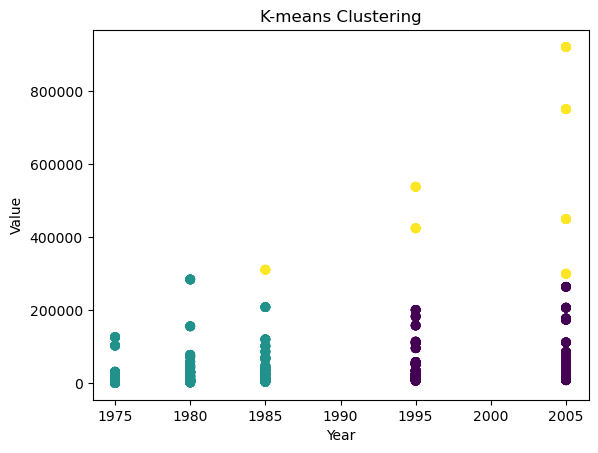

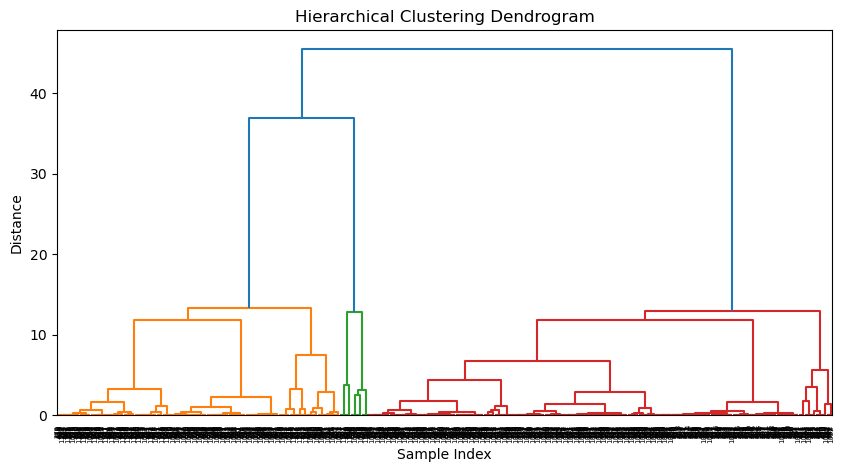


Hierarchical cluster counts:
Hier_Cluster
1    672
3    408
2     40
Name: count, dtype: int64


In [92]:
# ===== Question 18 =====

# UAE Project Pipeline
# Inspired by Weeks 1-12: IO, Wrangling, Descriptive Stats, EDA,
# Preprocessing, Regression, Classification (optional), Clustering, PCA, Evaluation.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Step 1: Select numeric fields for clustering
df_numeric = df[['value','year']].dropna()  # choose any numeric fields

# Step 2: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# ===== K-MEANS CLUSTERING =====
kmeans = KMeans(n_clusters=3, random_state=42)  # choose 3 clusters as example
kmeans_labels = kmeans.fit_predict(data_scaled)
df_numeric['KMeans_Cluster'] = kmeans_labels

print("K-means cluster centers (scaled):")
print(kmeans.cluster_centers_)
print("\nCluster counts:")
print(df_numeric['KMeans_Cluster'].value_counts())

# Optional: visualize K-means clusters
plt.scatter(df_numeric['year'], df_numeric['value'], c=kmeans_labels, cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('K-means Clustering')
plt.show()

# ===== HIERARCHICAL CLUSTERING =====
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           labels=df_numeric.index,
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (example: 3 clusters)
hier_labels = fcluster(linked, 3, criterion='maxclust')
df_numeric['Hier_Cluster'] = hier_labels
print("\nHierarchical cluster counts:")
print(df_numeric['Hier_Cluster'].value_counts())
